In [89]:
import numpy as np
import pandas as pd
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
!pip install kmodes
from kmodes.kmodes import KModes
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv("C:/Users/12300/Downloads/cardio_train.csv/cardio_train.csv")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


* id: An identifier for each individual in the dataset.
* age: The age of the individual (in days).
* gender: Gender (1 for female, 2 for male).
* height: Height in centimeters.
* weight: Weight in kilograms.
* ap_hi: Systolic blood pressure (measured in mmHg).
* ap_lo: Diastolic blood pressure (measured in mmHg).
* cholesterol: Cholesterol level (1, 2, or 3).
* gluc: Glucose level (1, 2, or 3).
* smoke: Whether the individual smokes (0 for no, 1 for yes).
* alco: Whether the individual consumes alcohol (0 for no, 1 for yes).
* active: Whether the individual is physically active (0 for no, 1 for yes).
* cardio: Presence of cardiovascular disease (0 for no, 1 for yes).

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [48]:
df.shape

(70000, 13)

In [49]:
print(df.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [50]:
df.duplicated().sum()

0

In [51]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


## Data manipulation

In [53]:
df.drop('id',axis=1,inplace=True)

df['age'] = (df['age'] / 365).round().astype('int')

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


## EDA

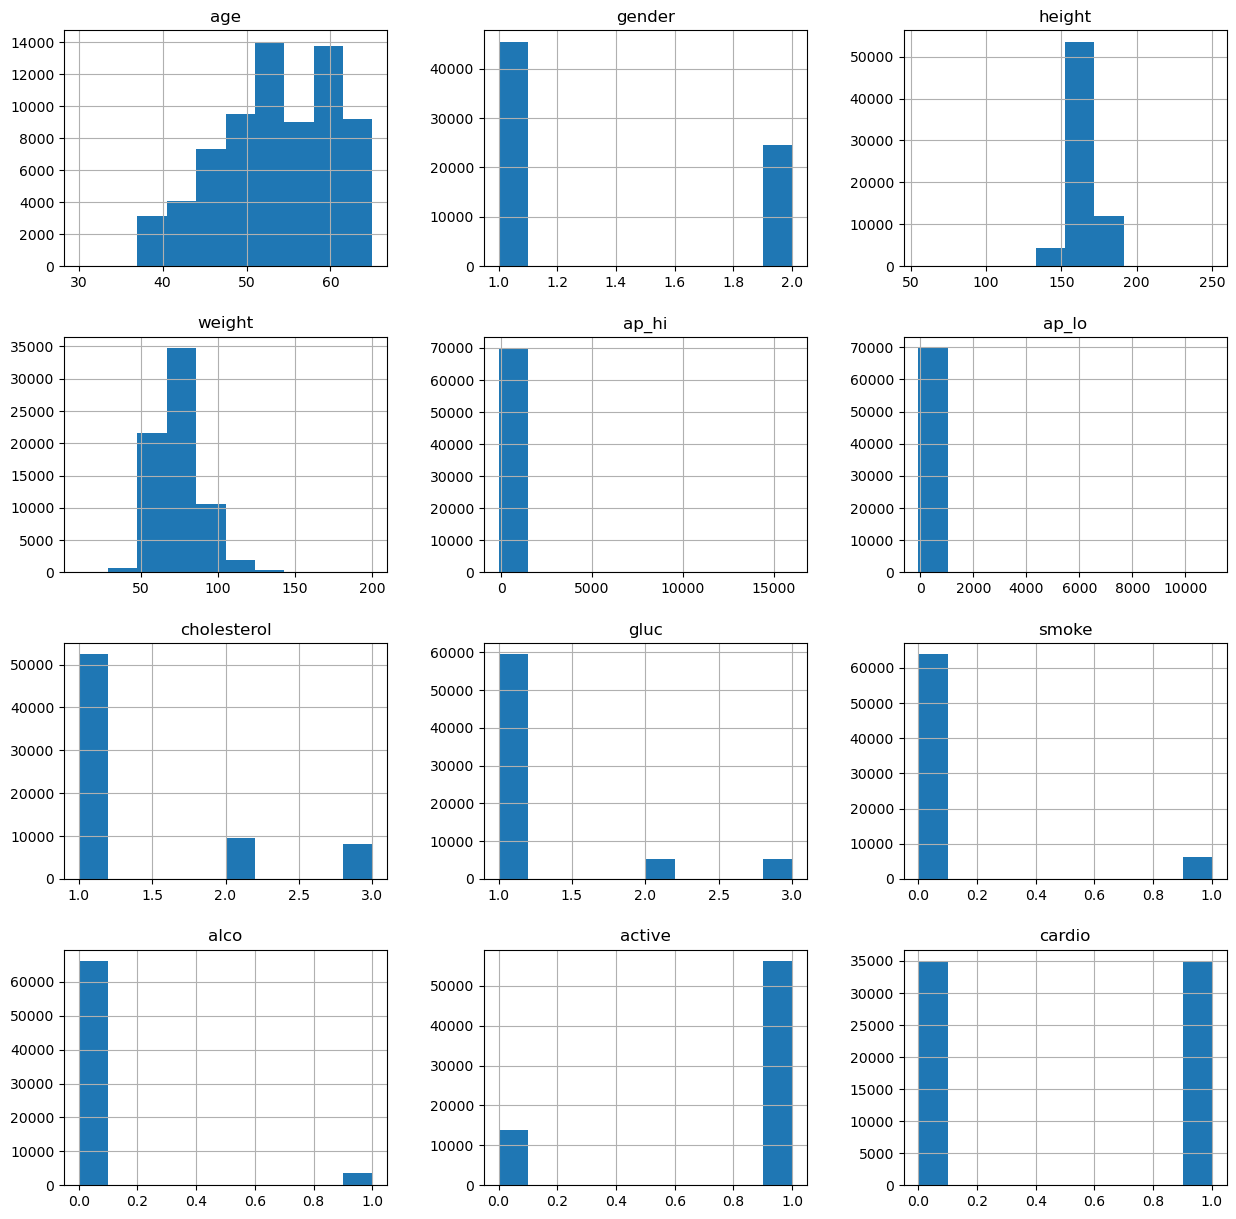

In [54]:
df.iloc[:,0:].hist(figsize=(15,15));

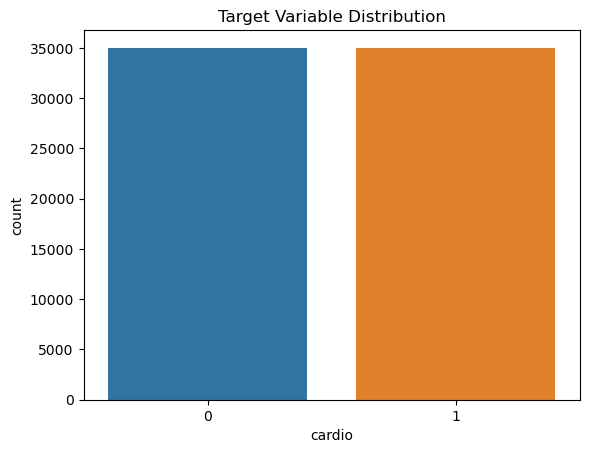

In [55]:
# Distribution of the target variable
sns.countplot(x='cardio', data=df)
plt.title('Target Variable Distribution')
plt.show()

In [56]:
#the risk of cardio by age
mean_cardio_by_age=df.groupby('age')['cardio'].mean()

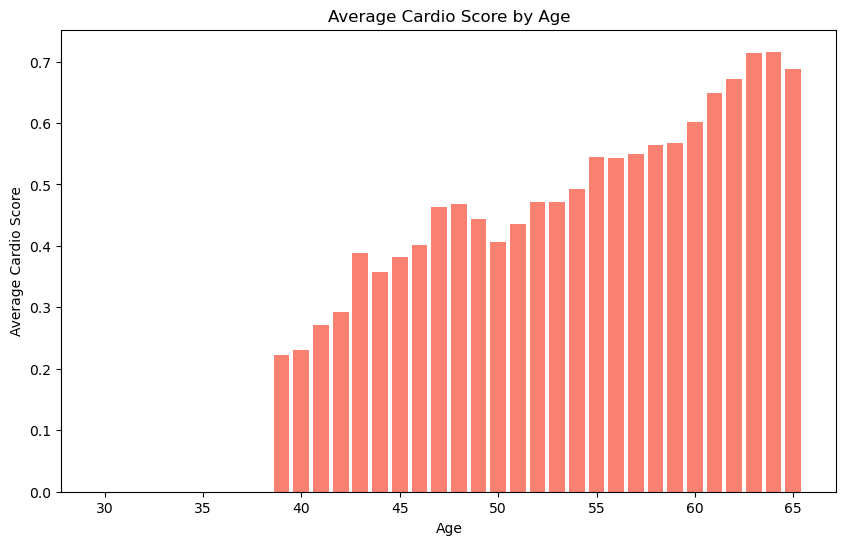

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(mean_cardio_by_age.index, mean_cardio_by_age.values,color='salmon')
plt.xlabel('Age')
plt.ylabel('Average Cardio Score')
plt.title('Average Cardio Score by Age')
plt.show()

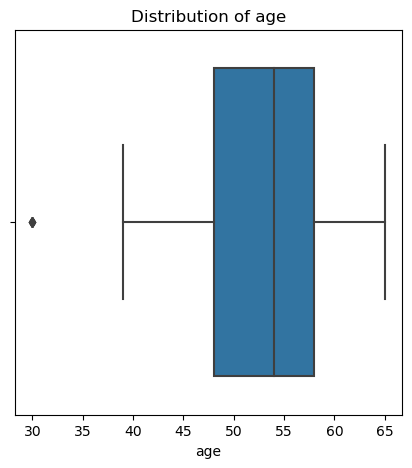

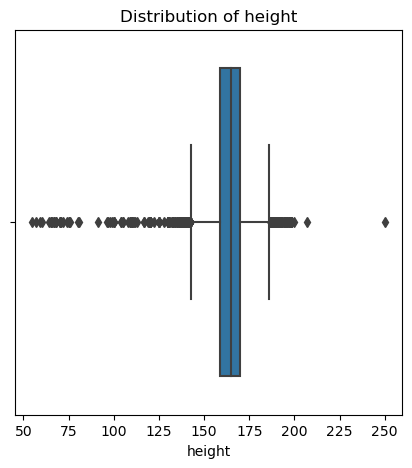

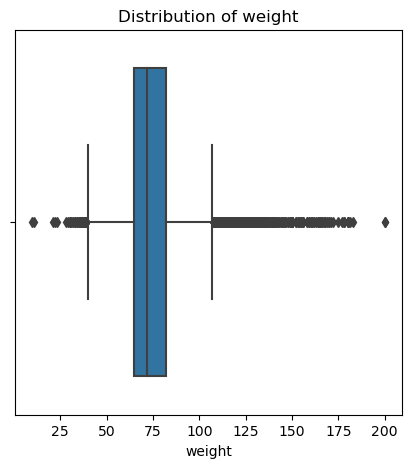

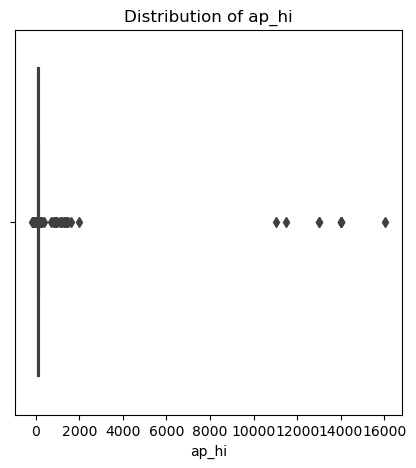

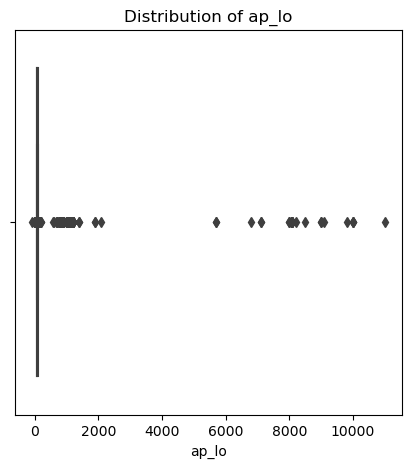

In [58]:
# Display the distibution of the continuous data columns
cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

for feature in cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.show()

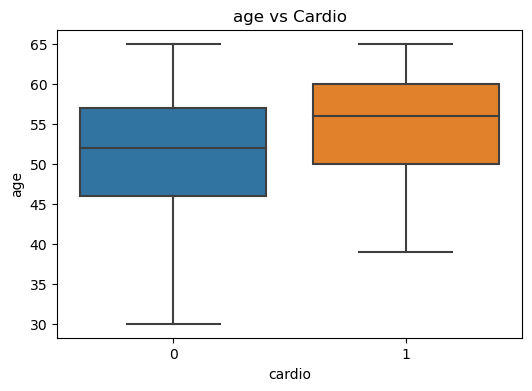

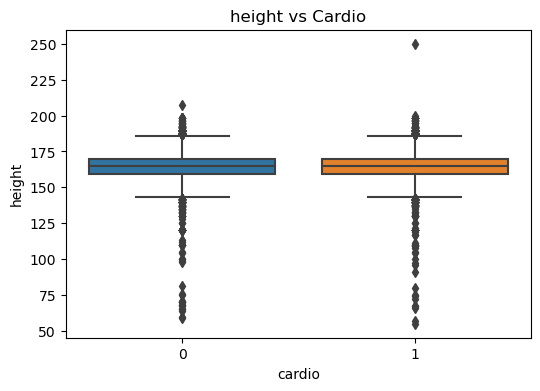

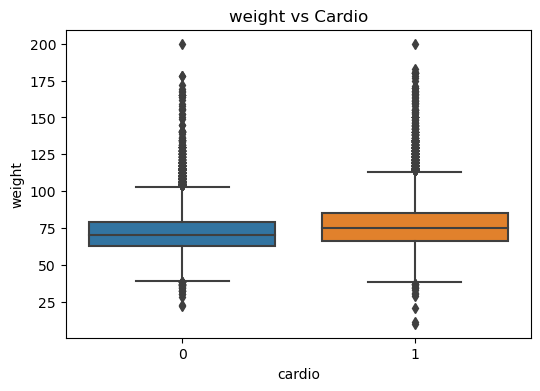

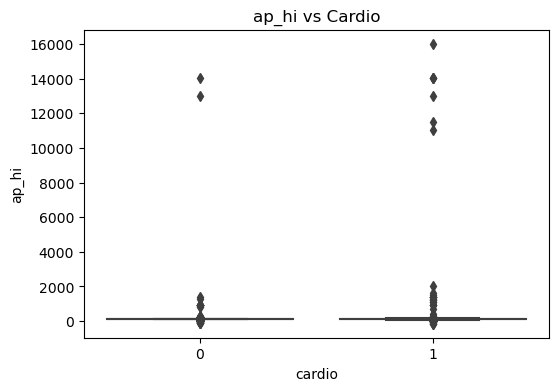

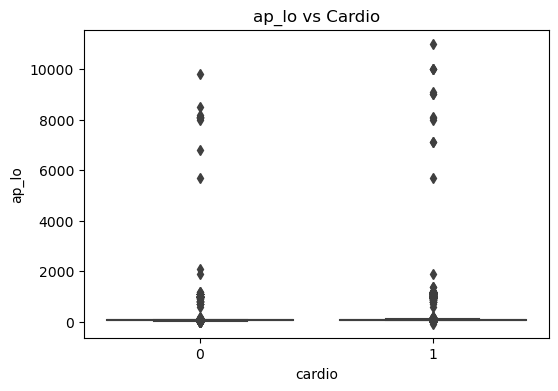

In [59]:
# Relationships Between Numerical and Target variable

num_cols = ['age', 'height', 'weight','ap_hi', 'ap_lo']

for feature in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='cardio', y=feature, data=df)
    plt.title(f'{feature} vs Cardio')
    plt.show()

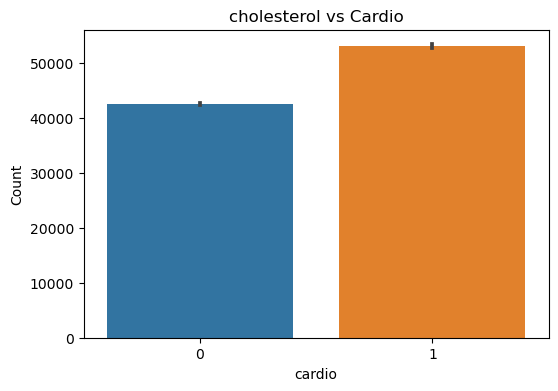

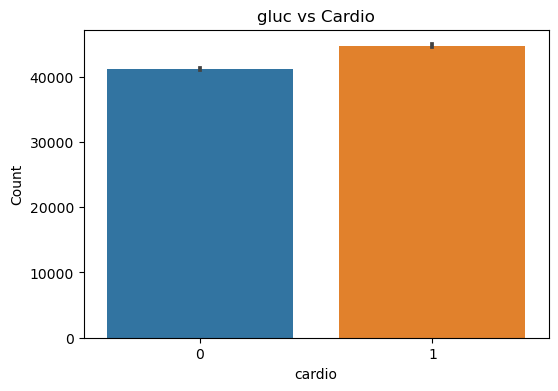

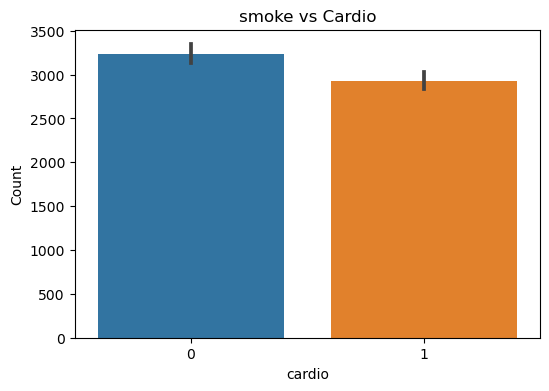

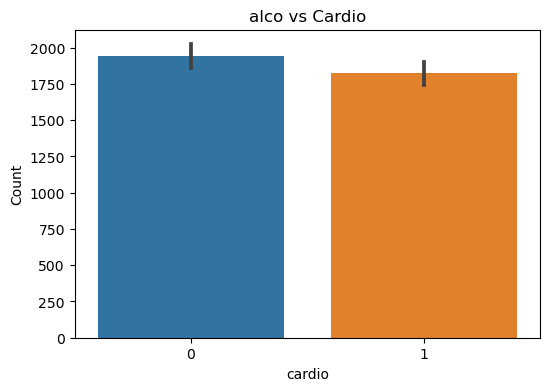

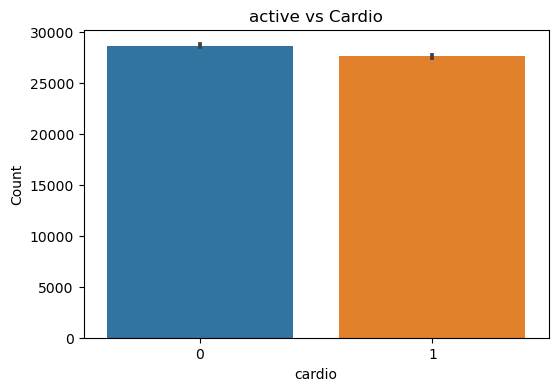

In [60]:
# Relationships Between categorical and Target variable

cat_cols = ['cholesterol', 'gluc', 'smoke', 'alco', 'active']

for feature in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.barplot(x='cardio', y=feature, data=df, estimator=np.sum)  # np.sum to show the total count or sum of values for each category of the feature.
    plt.title(f'{feature} vs Cardio')
    plt.ylabel('Count')
    plt.show()

## Correlation

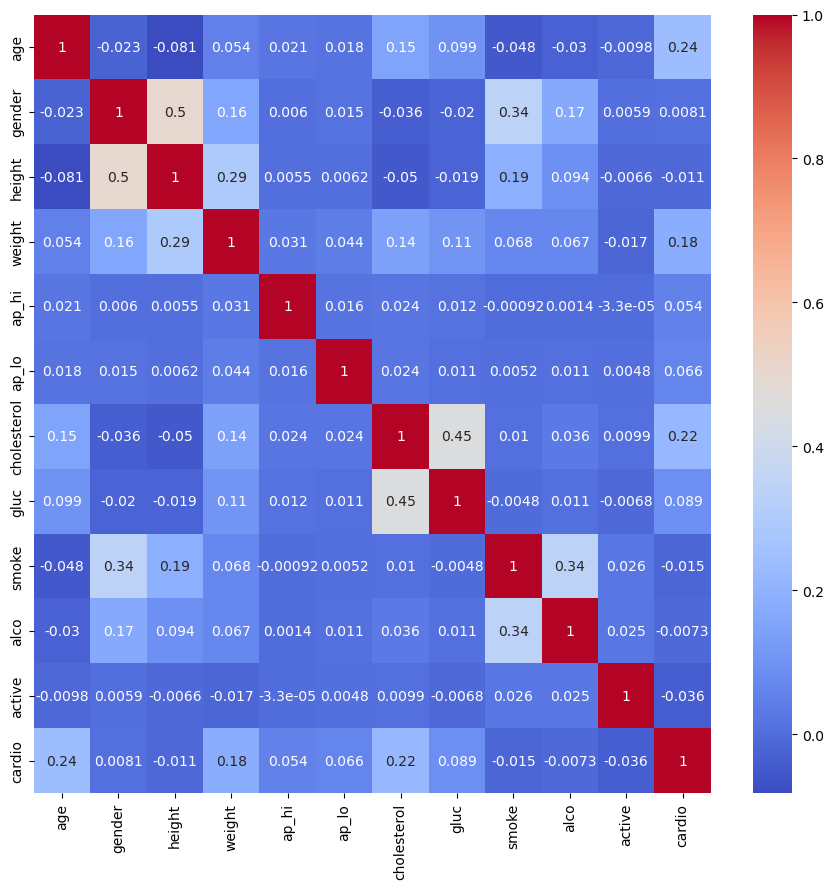

In [61]:
plt.figure(figsize=(9,9 ))
correlation=df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.tight_layout()

## Removing Outliers

In [62]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)
len(df)

60142

In [63]:
a = df.describe(percentiles =[0.01,0.02,0.03,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,50%,97%,98%,99%,max
age,30.0,40.0,40.0,40.0,54.0,64.0,64.0,64.0,65.0
gender,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
height,150.0,150.0,151.0,152.0,165.0,178.0,178.0,180.0,180.0
weight,52.0,53.0,54.0,55.0,72.0,99.0,100.0,103.0,106.0
ap_hi,100.0,100.0,100.0,100.0,120.0,160.0,160.0,160.0,163.0
ap_lo,60.0,60.0,60.0,69.0,80.0,100.0,100.0,100.0,100.0
cholesterol,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0
gluc,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0
smoke,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
alco,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


## Categorizing features

In [64]:
# # Define the bin edges and labels
age_edges = [30, 35, 40, 45, 50, 55, 60, 65]
age_labels = [0, 1, 2, 3, 4, 5, 6]

#  bin in  5 years span
df['age_group'] = pd.cut(df['age'], bins=7, labels=range(7), include_lowest=True,right=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3


In [65]:
df['bmi'] = df['weight']/((df['height']/100)**2)
df.head()

bmiMin = int(df['bmi'].min())
bmiMax = int(df['bmi'].max())

print(bmiMin, bmiMax)

df['bmi'] = pd.cut(df['bmi'], bins=6, labels=range(6), right=True, include_lowest=True)

df.head()


df["bmi"].value_counts(normalize=True)

16 46


1    0.461325
2    0.330202
3    0.133068
0    0.038193
4    0.033554
5    0.003658
Name: bmi, dtype: float64

In [66]:
df['bp_cat'] = ((2* df['ap_lo']) + df['ap_hi']) / 3

mapMin = int(df['bp_cat'].min())
mapMax = int(df['bp_cat'].max())

print(mapMin, mapMax)

df['bp_cat'] = pd.cut(df['bp_cat'], bins=6, labels=range(6), right=True, include_lowest=True)

df.head()

df['bp_cat'].value_counts()

73 121


2    30389
4     8147
1     7881
3     7255
5     3778
0     2692
Name: bp_cat, dtype: int64

In [67]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,bp_cat
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,1,2
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,3,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,1,2
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,2,5
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3,1,0


In [68]:
df1 = df.copy()

## Droping features
##### We only need categorical data

In [69]:
df=df.drop(['height','weight','ap_hi','ap_lo','age'],axis=1)

df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,bp_cat
0,2,1,1,0,0,1,0,3,1,2
1,1,3,1,0,0,1,1,4,3,4
2,1,3,1,0,0,0,1,4,1,2
3,2,1,1,0,0,1,1,3,2,5
4,1,1,1,0,0,0,0,3,1,0


## Label Encoder

In [70]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.describe()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,bp_cat
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,0.347311,0.350953,0.220229,0.085631,0.051877,0.803648,0.488228,4.042233,1.673440,2.359449
std,0.476120,0.670076,0.567607,0.279820,0.221781,0.397241,0.499866,1.377070,0.898707,1.186906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.000000,3.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,5.000000


## Clustering

In [72]:
cost = []
num_clusters = range(1,6) # 1 to 5
for i in list(num_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 5, verbose=0,random_state=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

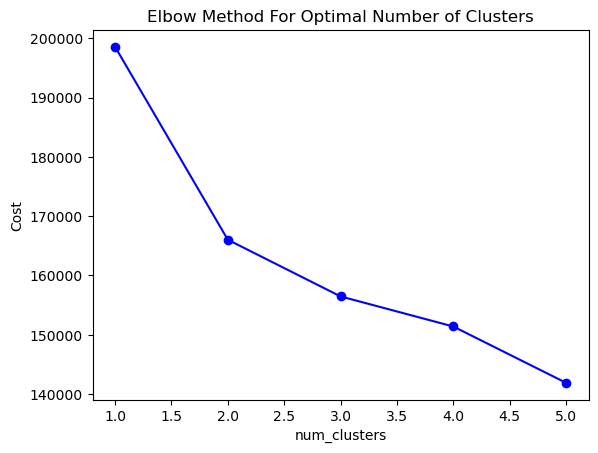

In [73]:
plt.plot(num_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [74]:
km = KModes(n_clusters=2, init = "Huang", n_init = 5,random_state=1)
clusters = km.fit_predict(df)
clusters

array([1, 0, 1, ..., 1, 0, 1], dtype=uint16)

In [75]:
df.insert(0,"clusters",clusters,True)

df.head()

,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,bp_cat
0,1,1,0,0,0,0,1,0,3,1,2
1,0,0,2,0,0,0,1,1,4,3,4
2,1,0,2,0,0,0,0,1,4,1,2
3,0,1,0,0,0,0,1,1,3,2,5
4,1,0,0,0,0,0,0,0,3,1,0


## Correlation after making categories

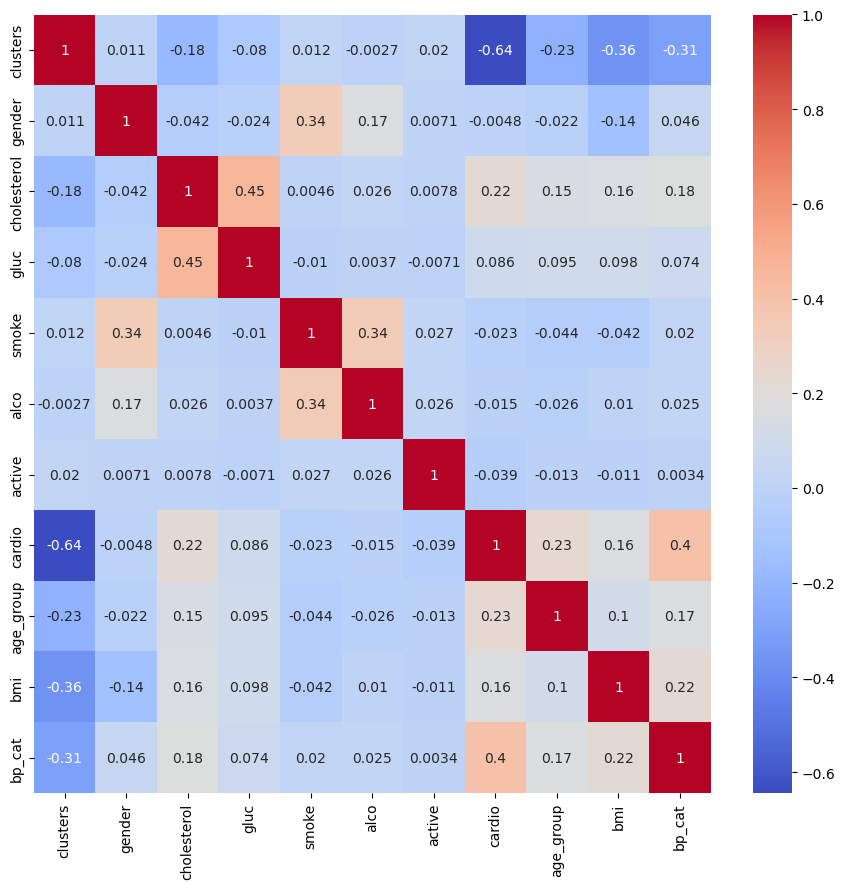

In [76]:
plt.figure(figsize=(9,9 ))
correlation=df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.tight_layout()

## Split data

In [77]:
x = df.drop(['cardio','gender'], axis=1)
y = df['cardio']

x.head()

,clusters,cholesterol,gluc,smoke,alco,active,age_group,bmi,bp_cat
0,1,0,0,0,0,1,3,1,2
1,0,2,0,0,0,1,4,3,4
2,1,2,0,0,0,0,4,1,2
3,0,0,0,0,0,1,3,2,5
4,1,0,0,0,0,0,3,1,0


In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [79]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48113 entries, 20655 to 38356
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clusters     48113 non-null  uint16
 1   cholesterol  48113 non-null  int64 
 2   gluc         48113 non-null  int64 
 3   smoke        48113 non-null  int64 
 4   alco         48113 non-null  int64 
 5   active       48113 non-null  int64 
 6   age_group    48113 non-null  int64 
 7   bmi          48113 non-null  int64 
 8   bp_cat       48113 non-null  int64 
dtypes: int64(8), uint16(1)
memory usage: 3.4 MB


## Logistic regression 

In [93]:
# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.8109568542688502


## Decision Tree

In [91]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.8734724415994679


## Random Forest

In [92]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8754676199185302


## Best model 

In [94]:
# Create a dictionary to store the models and their accuracies
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Iterate over the models and calculate their accuracies
model_accuracies = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

# Print the accuracy scores of all models
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Determine the best model
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"\nThe best model is: {best_model}")

Logistic Regression Accuracy: 0.8110
Decision Tree Accuracy: 0.8735
Random Forest Accuracy: 0.8755

The best model is: Random Forest
